In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Importing the Dataset

In [2]:
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### EDA

In [3]:
df.shape

(167, 10)

In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


No null values in any of the columns

In [6]:
df.sort_values('child_mort',ascending = False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.200,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708
...,...,...,...,...,...,...,...,...,...,...
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000


In [7]:
df.sort_values('gdpp',ascending = True)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399
...,...,...,...,...,...,...,...,...,...,...
44,Denmark,4.1,50.50,11.40,43.6,44000,3.220,79.5,1.87,58000
123,Qatar,9.0,62.30,1.81,23.8,125000,6.980,79.5,2.07,70300
145,Switzerland,4.5,64.00,11.50,53.3,55500,0.317,82.2,1.52,74600
114,Norway,3.2,39.70,9.48,28.5,62300,5.950,81.0,1.95,87800


In [8]:
df.sort_values('life_expec',ascending = True)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.150,46.5,3.30,1170
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446
166,Zambia,83.1,37.0,5.89,30.9,3280,14.000,52.0,5.40,1460
94,Malawi,90.5,22.8,6.59,34.9,1030,12.100,53.1,5.31,459
...,...,...,...,...,...,...,...,...,...,...
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


### Since exports, imports and health columns are a percentage of GDP, we need to make it absolute.

In [9]:
cols = ['exports','imports','health']
for i in cols:
    df[i] = (df[i]*df['gdpp'])/100

In [10]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


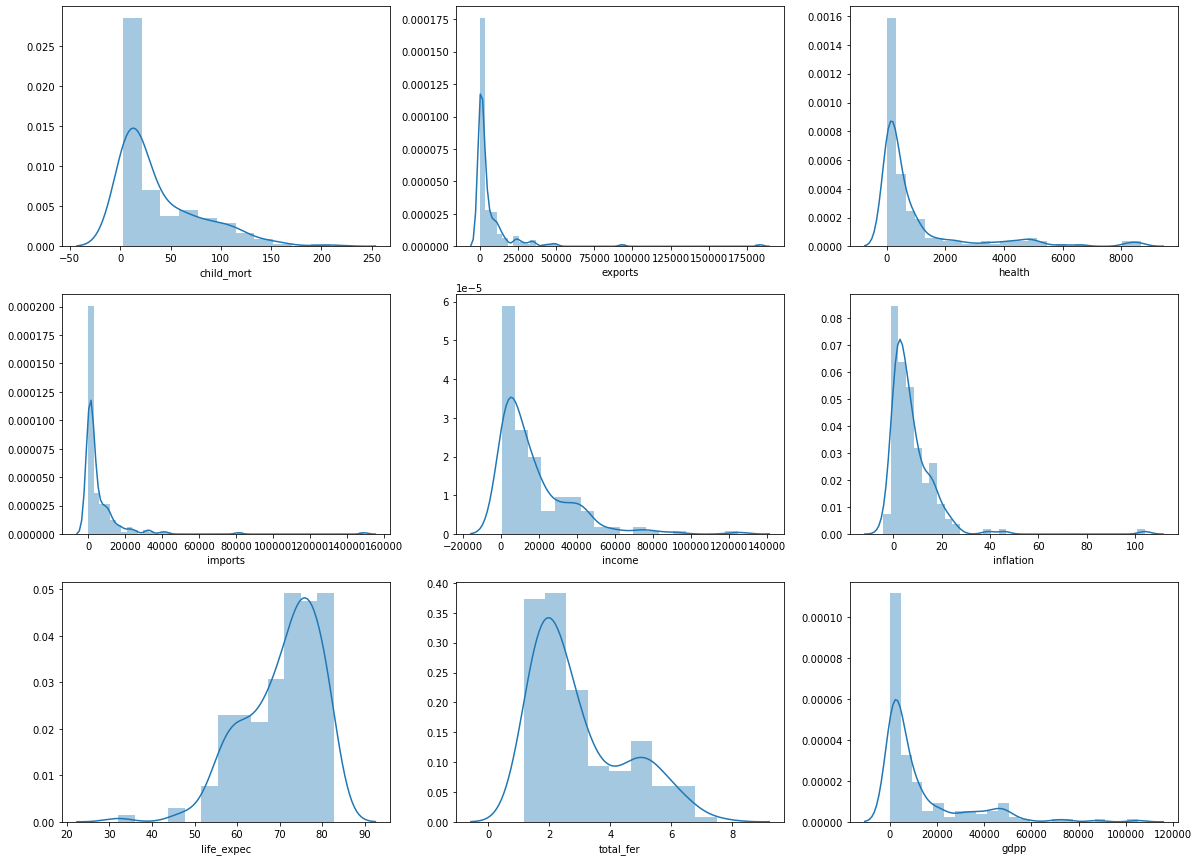

In [11]:
feature = df.columns[1:]
plt.figure(figsize=[20,15])
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])    

We need to use Child mortality, income and gdp for cluster profiling as we can see there is a distict pater in them to form clusters separately and they are crucial factors for a country

### Checking the Hopkins score

In [12]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

### Scaling the data

In [13]:
from sklearn.preprocessing import StandardScaler
rfm_df = df[['total_fer','exports','gdpp','health','imports','income','child_mort','inflation','life_expec']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)


In [14]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
hopkins(rfm_df_scaled)

0.9297468616391789

Since the hopkins statistics is a high value, this data can be used for clustering

### Outlier Treatment

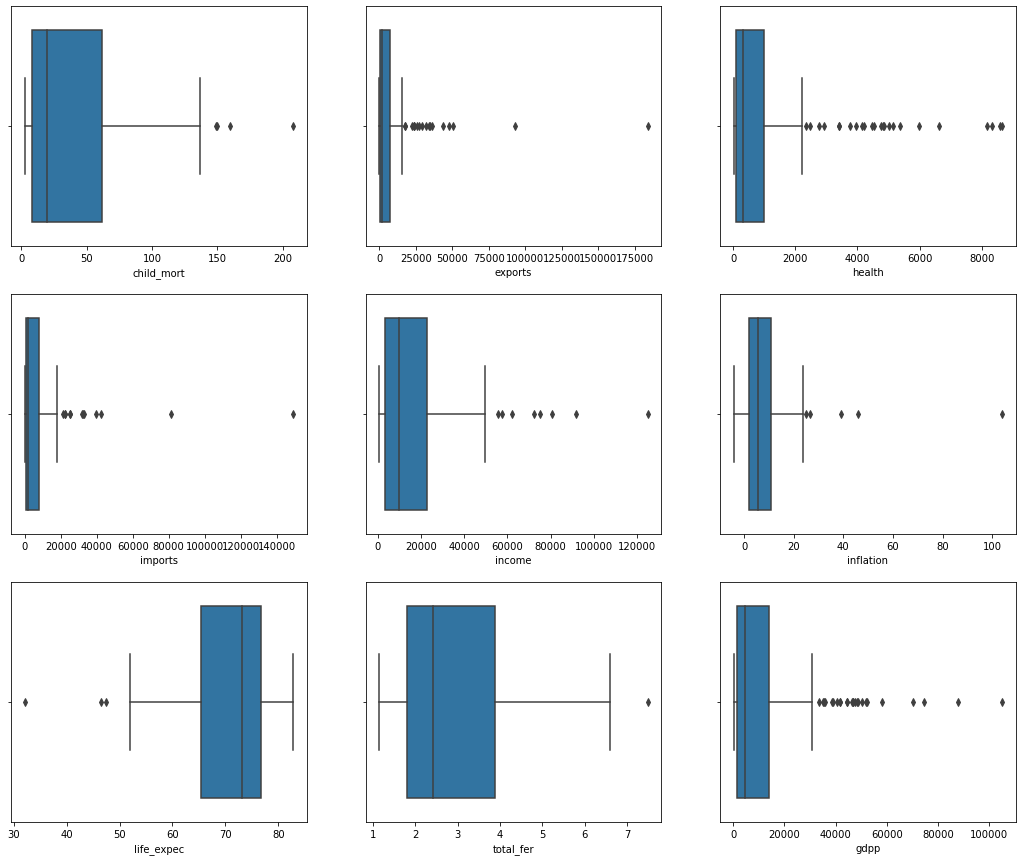

In [15]:
feature = df.columns[1:]
plt.figure(figsize=[18,15])
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])    

### Capping to be performed for the outliers
Soft capping will be performed which is between 0.01 and 0.99

In [16]:
q1 = df['child_mort'].quantile(0.01)
df['child_mort'][df['child_mort'] <= q1] = q1

In [17]:
lst = ['total_fer','exports','gdpp','health','imports','income']
for i in lst:
    q4 = df[i].quantile(0.99)
    df[i][df[i]>=q4] = q4

In [18]:
df1 = df # we will use df1 for single linkage hierarchical clustering

In [19]:
df2 = df # we will use df2 for complete linkage hierarchical clustering

### Plotting the elbow curve to find the number of clusters to be formed

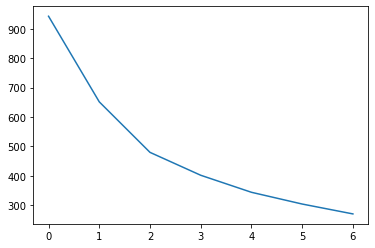

In [20]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

By plotting the elbow curve we find that the elbow is at 3

In [21]:
# silhouette analysis

from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.45863306035476264
For n_clusters=3, the silhouette score is 0.4218615812599681
For n_clusters=4, the silhouette score is 0.42914711278370843
For n_clusters=5, the silhouette score is 0.433474782094518
For n_clusters=6, the silhouette score is 0.29474209667927426
For n_clusters=7, the silhouette score is 0.2780785193612629
For n_clusters=8, the silhouette score is 0.3019489103498275


The silhoutte score does not decrease much after 3 clusters

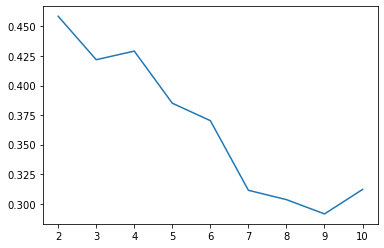

In [22]:
from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(rfm_df_scaled)
    ss.append([k, silhouette_score(rfm_df_scaled, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

From the graph we can observe that the number of clusters should be kept at 3, hence we make a k-means clustering model keeping number of clusters as 3

In [23]:
# model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [25]:
df['cluster_id'] = kmeans.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


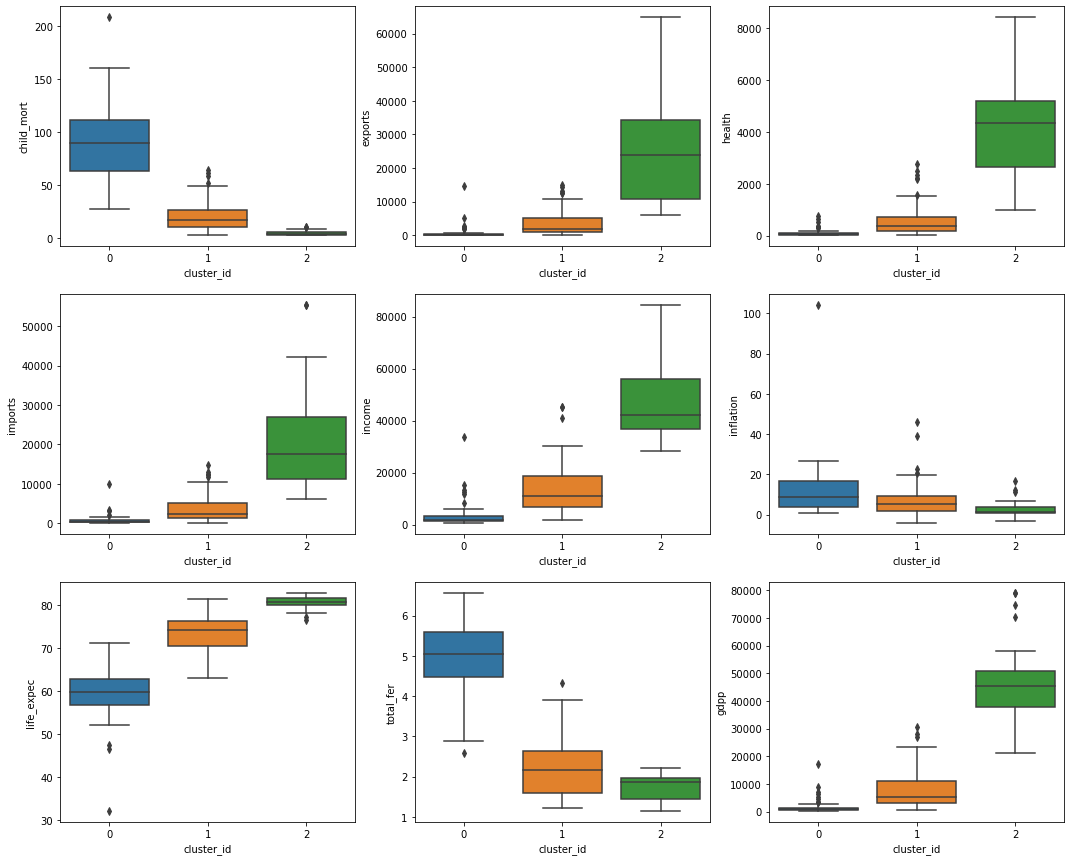

In [26]:
feature = df.columns[1:-1]
plt.figure(figsize=[18,15])
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x= 'cluster_id', y = df[i[1]], data=df)  

From these boxplots we observe that cluster 0 countries are suffering the most as they have low life expectancy,low imports, low exports, low income, low gdp, low health score and high child mortality rate. Hence we will consider cluster 0 countries for analysing their scores 

#### Finding the distribution of data points among the different clusters

In [27]:
df.cluster_id.value_counts()

1    91
0    48
2    28
Name: cluster_id, dtype: int64

## Cluster Profiling

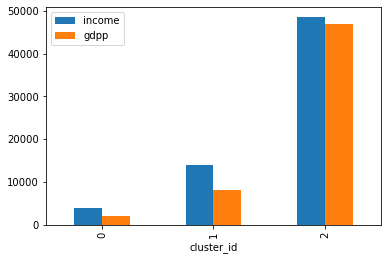

In [28]:
df.drop(['exports','health','imports','inflation','life_expec','total_fer','child_mort'],axis = 1).groupby('cluster_id').mean().plot(kind='bar')

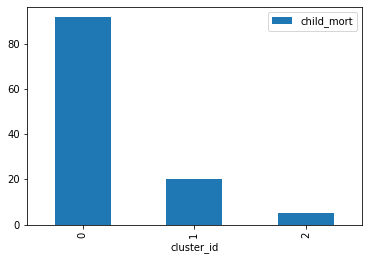

In [29]:
df.drop(['exports','health','imports','inflation','life_expec','total_fer','gdpp','income'],axis = 1).groupby('cluster_id').mean().plot(kind='bar')

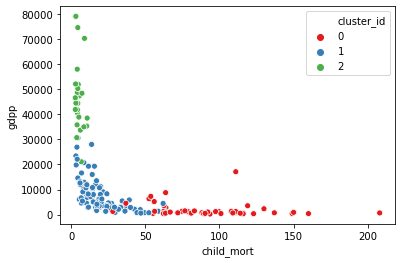

In [30]:
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue = 'cluster_id',data=df,palette = 'Set1')
plt.show()

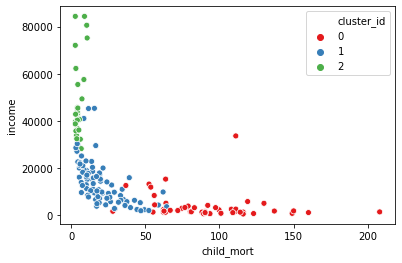

In [31]:
sns.scatterplot(x = 'child_mort', y = 'income',hue = 'cluster_id',data=df,palette = 'Set1')
plt.show()

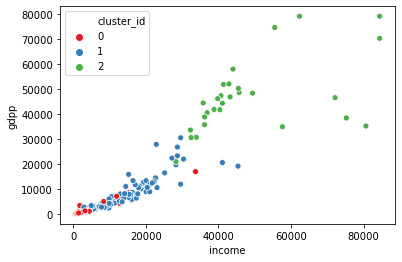

In [32]:
sns.scatterplot(x = 'income', y = 'gdpp',hue = 'cluster_id',data=df,palette = 'Set1')
plt.show()

From the above 3 plots we observe that cluster 0 has low income, low GDP per capita and high child mortality rate. 

In [33]:
df[df['cluster_id'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.8200,553.0,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530.0,0
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.3600,758.0,0
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.8800,6350.0,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.2600,231.0,0
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.1100,1310.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,0
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0,0
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.7500,769.0,0


In [34]:
df[df['cluster_id'] == 0].sort_values(by = ['child_mort', 'income','gdpp'], ascending = [False, True,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.5636,897.0,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.5500,708.0,0


Next we will be doing heirarchical clustering before finalising on which countries need to be chosen by the NGO 

## Heirarchical Clustering

In [35]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Single Linkage

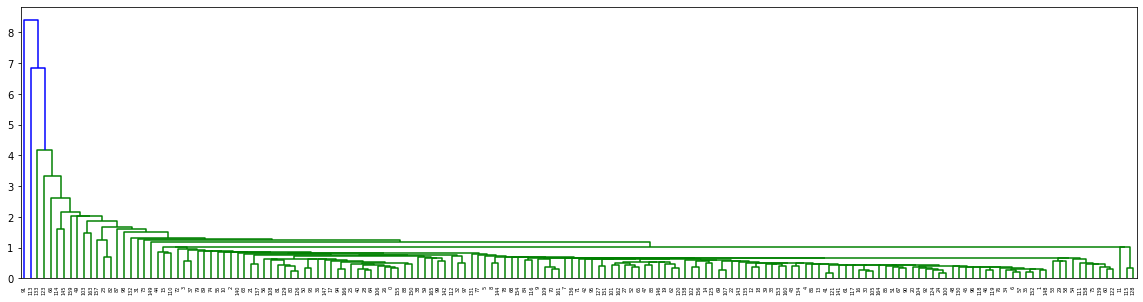

In [36]:
#single Linkage
plt.figure(figsize=[20,5])
mergings_1 = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings_1)
plt.show()

In [37]:
cluster_labels_1 = cut_tree(mergings_1, n_clusters=2).reshape(-1, )
cluster_labels_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
df1['cluster_labels_1'] = cluster_labels_1

### Cluster Profiling

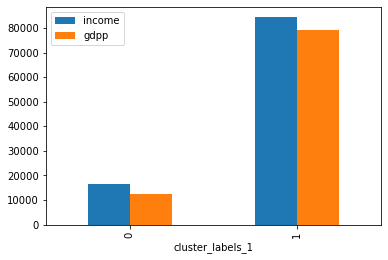

In [39]:
df1.drop(['exports','health','imports','inflation','life_expec','total_fer','child_mort','cluster_id'],axis = 1).groupby('cluster_labels_1').mean().plot(kind='bar')

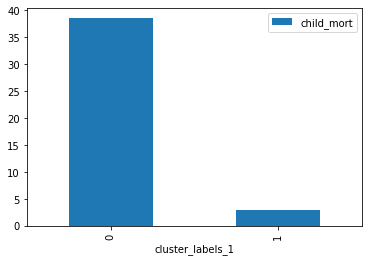

In [40]:
df1.drop(['exports','health','imports','inflation','life_expec','total_fer','income','gdpp','cluster_id'],axis = 1).groupby('cluster_labels_1').mean().plot(kind='bar')

In [41]:
df1[df1['cluster_labels_1'] == 0].sort_values(by = ['child_mort', 'income','gdpp'], ascending = [False, True,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels_1
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,0,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,0,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.5636,897.0,0,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,0,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.5500,708.0,0,0


### Complete Linkage

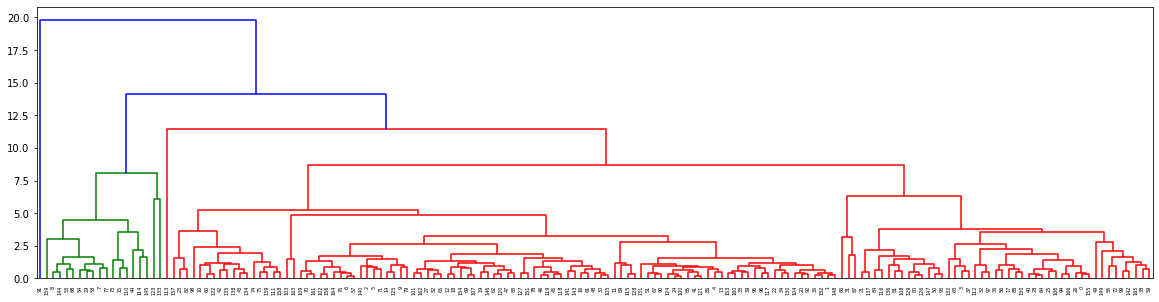

In [42]:
# complete linkage
plt.figure(figsize=[20,5])
mergings_2 = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings_2)
plt.show()

Complete linkage provides better distribution of data among the clusters

In [43]:
cluster_labels_2 = cut_tree(mergings_2, n_clusters=3).reshape(-1, )
cluster_labels_2

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [44]:
df2['cluster_labels_2'] = cluster_labels_2

## Cluster Profiling

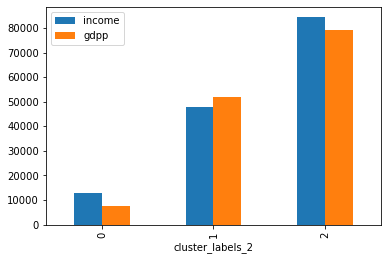

In [45]:
df2.drop(['exports','health','imports','inflation','life_expec','total_fer','child_mort','cluster_id','cluster_labels_1'],axis = 1).groupby('cluster_labels_2').mean().plot(kind='bar')

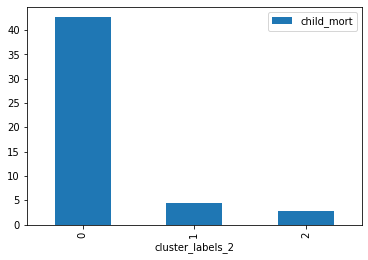

In [46]:
df2.drop(['exports','health','imports','inflation','life_expec','total_fer','income','gdpp','cluster_id','cluster_labels_1'],axis = 1).groupby('cluster_labels_2').mean().plot(kind='bar')

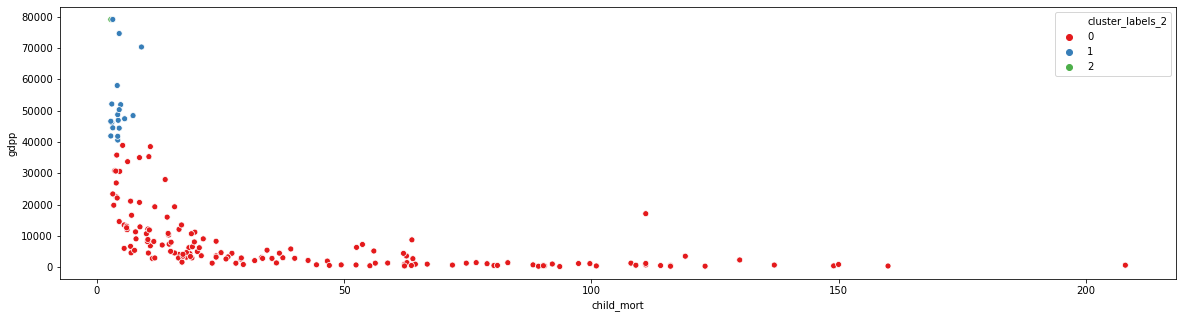

In [47]:
plt.figure(figsize=[20,5])
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue = 'cluster_labels_2',data=df2,palette = 'Set1')
plt.show()

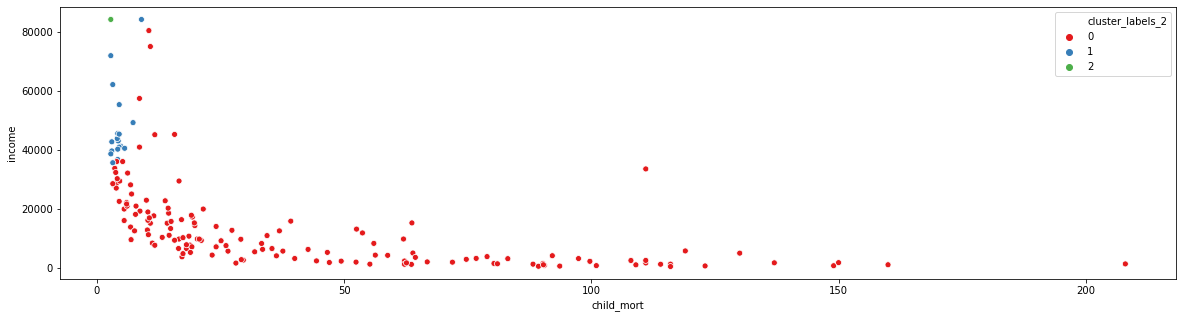

In [48]:
plt.figure(figsize=[20,5])
sns.scatterplot(x = 'child_mort', y = 'income',hue = 'cluster_labels_2',data=df2,palette = 'Set1')
plt.show()

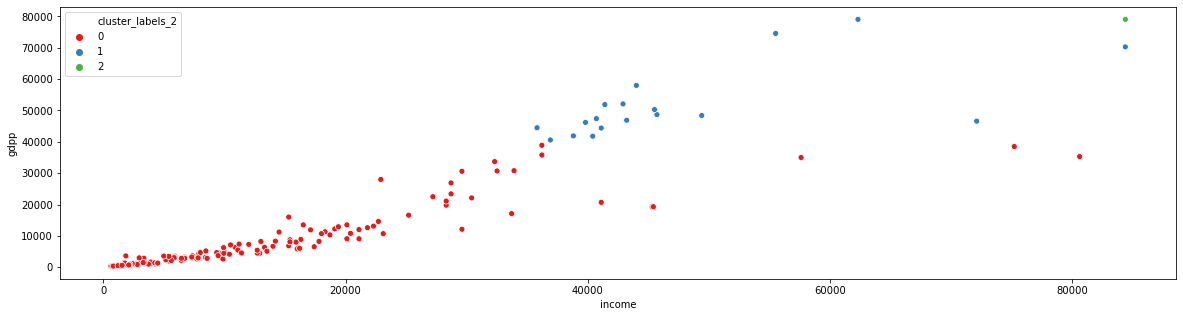

In [49]:
plt.figure(figsize=[20,5])
sns.scatterplot(x = 'income', y = 'gdpp',hue = 'cluster_labels_2',data=df2,palette = 'Set1')
plt.show()

In [50]:
df2[df2['cluster_labels_2'] == 0].sort_values(by = ['child_mort', 'income','gdpp'], ascending = [False, True,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels_1,cluster_labels_2
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,0,0,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,0,0,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.5636,897.0,0,0,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,0,0,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.5500,708.0,0,0,0


## Conclusion

After careful analysis of the data , we have observed that ```Haiti, Sierra Leone, Chad, Central African Republic and Mali ``` are the countries suffering the most. They have low GDP, low income, low life expectancy and high child mortality rate. Hence these countries are in dire need of aid.  